**Base Titanic **

In [1]:
!pip -q install yellowbrick
!pip install treeinterpreter

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier

In [8]:
import pickle
with open('/content/sample_data/titanic.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

In [9]:
X_treino

,Pclass,Sex,Age,SibSp,Parch
331,1,1,1,0,0
733,2,1,4,0,0
382,3,1,1,0,0
704,3,1,4,1,0
813,3,0,2,4,2
...,...,...,...,...,...
106,3,0,4,0,0
270,1,1,4,0,0
860,3,1,1,2,0
435,1,0,0,1,2


In [10]:
modelo = RandomForestClassifier(n_estimators=80, max_features=3, criterion='gini', random_state = 42)
modelo.fit(X_treino, y_treino)

RandomForestClassifier(max_features=3, n_estimators=80, random_state=42)



> **Vamos testar o modelo?**



In [11]:
previsoes = modelo.predict(X_teste)

In [12]:
previsoes

array(['nao morreu', 'morreu', 'morreu', 'nao morreu', 'morreu',
       'nao morreu', 'nao morreu', 'morreu', 'nao morreu', 'nao morreu',
       'morreu', 'morreu', 'morreu', 'morreu', 'morreu', 'nao morreu',
       'morreu', 'nao morreu', 'morreu', 'morreu', 'morreu', 'morreu',
       'nao morreu', 'morreu', 'morreu', 'morreu', 'morreu', 'morreu',
       'morreu', 'morreu', 'morreu', 'nao morreu', 'morreu', 'nao morreu',
       'morreu', 'morreu', 'morreu', 'nao morreu', 'nao morreu', 'morreu',
       'morreu', 'morreu', 'morreu', 'morreu', 'nao morreu', 'morreu',
       'morreu', 'morreu', 'morreu', 'morreu', 'nao morreu', 'nao morreu',
       'morreu', 'nao morreu', 'morreu', 'nao morreu', 'morreu',
       'nao morreu', 'nao morreu', 'nao morreu', 'morreu', 'nao morreu',
       'nao morreu', 'morreu', 'morreu', 'nao morreu', 'morreu', 'morreu',
       'morreu', 'nao morreu', 'nao morreu', 'nao morreu', 'morreu',
       'nao morreu', 'morreu', 'morreu', 'morreu', 'nao morreu',
      



> **Será se o modelo acertou?**



In [13]:
y_teste

,Survived
709,nao morreu
439,morreu
840,morreu
720,nao morreu
39,nao morreu
...,...
433,morreu
773,morreu
25,nao morreu
84,nao morreu


In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.8324022346368715

In [15]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[95, 10],
       [20, 54]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8324022346368715

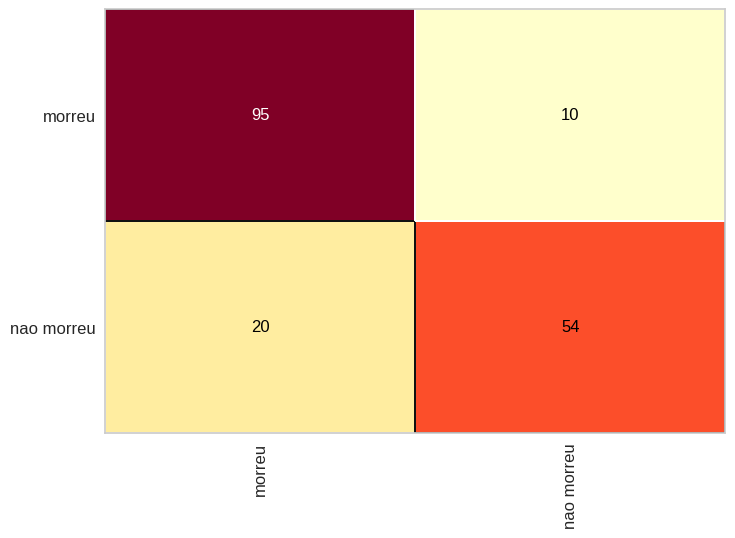

In [16]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [17]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

      morreu       0.83      0.90      0.86       105
  nao morreu       0.84      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



**Vamos ver os atributos que o Random considerou como mais importantes?**

Variáveis mais relevantes:
Sex: 0.47936314601852625
Pclass: 0.19799862738113547
Age: 0.13163256323507097
SibSp: 0.10439707573162797
Parch: 0.08660858763363949


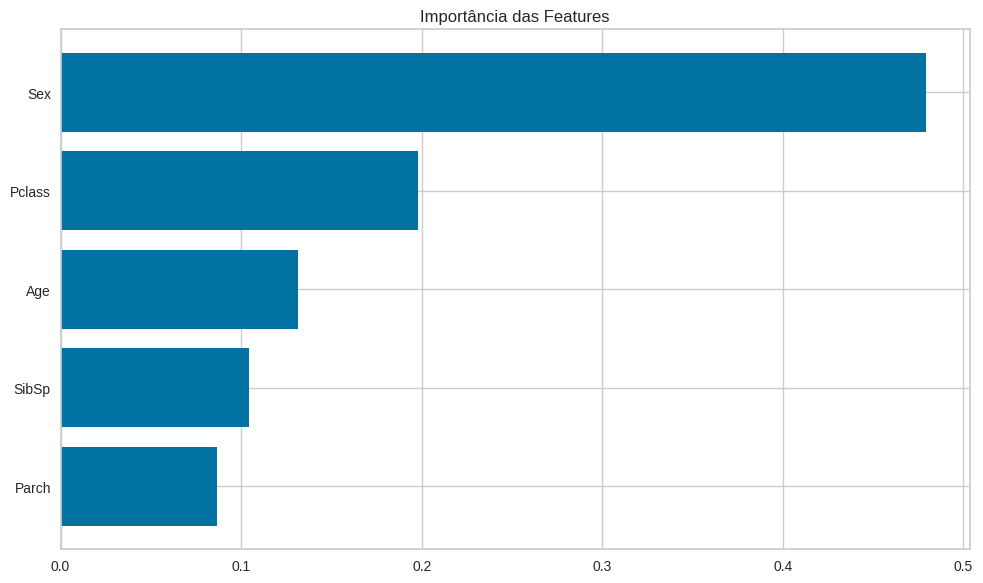

In [18]:
# Obter a importância das features
importancias = modelo.feature_importances_

# Pegando os nomes dos atributos
nomes_das_features = X_treino.columns

# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_treino.shape[1]), importancias[indices_ordenados], align="center")
plt.yticks(range(X_treino.shape[1]), nomes_das_features[indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()